In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import MaxNLocator
import numpy as np 


%matplotlib inline

In [4]:
exchange_rates = pd.read_csv('/Users/hannahpaxton/Desktop/Projects/Dataquest/exchange_rates/euro-daily-hist_1999_2020.csv')

print(exchange_rates.head())
print(exchange_rates.tail())
exchange_rates.info()

  Period\Unit: [Australian dollar ] [Bulgarian lev ] [Brazilian real ]  \
0   2021-01-08               1.5758           1.9558            6.5748   
1   2021-01-07               1.5836           1.9558            6.5172   
2   2021-01-06               1.5824           1.9558            6.5119   
3   2021-01-05               1.5927           1.9558            6.5517   
4   2021-01-04               1.5928           1.9558            6.3241   

  [Canadian dollar ] [Swiss franc ] [Chinese yuan renminbi ] [Cypriot pound ]  \
0             1.5543         1.0827                   7.9184              NaN   
1             1.5601         1.0833                   7.9392              NaN   
2             1.5640         1.0821                   7.9653              NaN   
3             1.5651         1.0803                   7.9315              NaN   
4             1.5621         1.0811                   7.9484              NaN   

  [Czech koruna ] [Danish krone ]  ... [Romanian leu ] [Russian roub

In [5]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [6]:
euro_to_dollar = exchange_rates[['Time', 'US_dollar']]

euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5637 non-null   datetime64[ns]
 1   US_dollar  5637 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB


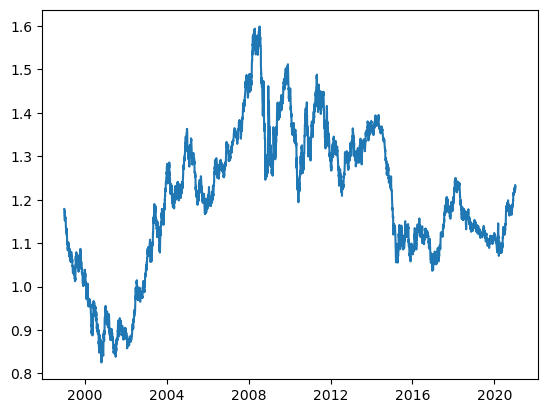

In [7]:
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.show()

In [8]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()
euro_to_dollar.tail()

,Time,US_dollar,rolling_mean
5694,2021-01-04,1.2296,1.211170
5695,2021-01-05,1.2271,1.212530
5696,2021-01-06,1.2338,1.213987
5697,2021-01-07,1.2276,1.215357
5698,2021-01-08,1.2250,1.216557


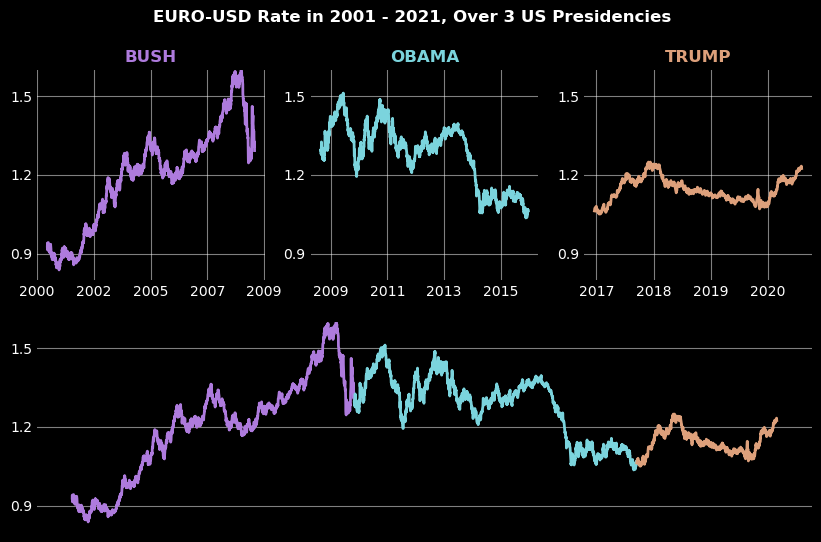

In [155]:
#styling
plt.style.use('dark_background')
plt.rcParams['lines.linewidth'] = 2

#set up desired grid layout
fig = plt.figure(figsize=(10, 6))
gs = GridSpec(2,3, figure=fig, hspace=0.2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, :])
fig.suptitle("EURO-USD Rate in 2001 - 2021, Over 3 US Presidencies", weight="bold")

#segment data and plot
bush_data = euro_to_dollar[(euro_to_dollar['Time'] >= '2001-01-20') & (euro_to_dollar['Time'] <= '2009-01-20')]
obama_data = euro_to_dollar[(euro_to_dollar['Time'] >= '2009-01-20') & (euro_to_dollar['Time'] <= '2017-01-20')]
trump_data = euro_to_dollar[(euro_to_dollar['Time'] >= '2017-01-20') & (euro_to_dollar['Time'] <= '2021-01-20')]

ax1.plot(bush_data['Time'], bush_data['US_dollar'], color="#ae7bdd")
ax1.set_title("BUSH", weight="bold", color="#ae7bdd")
ax2.plot(obama_data['Time'], obama_data['US_dollar'], color="#7bd4dd")
ax2.set_title("OBAMA", weight="bold", color="#7bd4dd")
ax3.plot(trump_data['Time'], trump_data['US_dollar'], color="#dda07b")
ax3.set_title("TRUMP", weight="bold", color="#dda07b")

ax4.plot(bush_data['Time'], bush_data['US_dollar'], color="#ae7bdd")
ax4.plot(obama_data['Time'], obama_data['US_dollar'], color="#7bd4dd")
ax4.plot(trump_data['Time'], trump_data['US_dollar'], color="#dda07b")

#formatting loops
all_axes = [ax1, ax2, ax3, ax4]
per_pres_axes = [ax1, ax2, ax3]

for axes in all_axes:
    axes.set_ylim(.8, 1.6)
    axes.yaxis.set_major_locator(MaxNLocator(3))
    axes.set_frame_on(False)
    axes.tick_params(axis='both', which='both', length=0)
    axes.grid(axis='y', alpha=0.5)

for axes in per_pres_axes:
    axes.xaxis.set_major_locator(mdates.YearLocator())
    axes.xaxis.set_major_formatter(mdates.DateFormatter('%Y')) 
    axes.grid(True, alpha=0.5)
    axes.xaxis.set_major_locator(MaxNLocator(5))
    
ax4.set_xticks([])

plt.show()